In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


In [ ]:
import io
import pandas as pd
import numpy as np
train_data = pd.read_csv(io.BytesIO(uploaded['train.txt'] ), 
              sep=" " ,  header = None, dtype = 'Int64')

uploaded = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded['test.txt'] ), 
              sep=" " ,  header = None, dtype = 'Int64')

Saving test.txt to test.txt


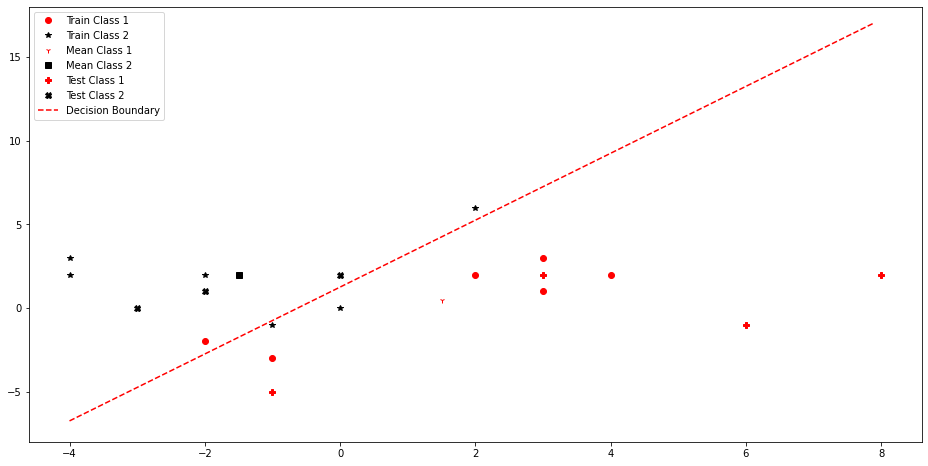

Accuracy: 85.71428571428571 %


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))

#PARSING TRAIN DATA
x=train_data[0]
y=train_data[1]
lbl=train_data[2]

x_axis_train=[]
y_axis_train=[]
label_train=[]

x_axis_train_1=[]
y_axis_train_1=[]

x_axis_train_2=[]
y_axis_train_2=[]

for i in x:
  x_axis_train.append(i)
for i in y:
  y_axis_train.append(i)
for i in lbl:
  label_train.append(i)

#SEPARATING TRAIN DATA INTO 2 CLASSES
for i in range(len(label_train)):
  if label_train[i]==1:
    x_axis_train_1.append(x_axis_train[i])
    y_axis_train_1.append(y_axis_train[i])
    
  else:
    x_axis_train_2.append(x_axis_train[i])
    y_axis_train_2.append(y_axis_train[i])

#FINDING RANGE OF VALUES OF TRAINING DATA
x_range=[]
y_range=[]

x_range.append(min(x_axis_train))
x_range.append(max(x_axis_train))

y_range.append(min(y_axis_train))
y_range.append(max(y_axis_train))


#PARSING TEST DATA
x=test_data[0]
y=test_data[1]
lbl=test_data[2]

x_axis_test=[]
y_axis_test=[]
label_test=[]

x_axis_test_1=[]
y_axis_test_1=[]

x_axis_test_2=[]
y_axis_test_2=[]


for i in x:
  x_axis_test.append(i)
for i in y:
  y_axis_test.append(i)
for i in lbl:
  label_test.append(i)

#SEPARATING TEST DATA INTO 2 CLASSES
for i in range(len(label_test)):
  if label_test[i]==1:
    x_axis_test_1.append(x_axis_test[i])
    y_axis_test_1.append(y_axis_test[i])
    
  else:
    x_axis_test_2.append(x_axis_test[i])
    y_axis_test_2.append(y_axis_test[i])

#PLOTTING TRAIN DATA
plt.plot(x_axis_train_1,y_axis_train_1,'ro',label='Train Class 1')
plt.plot(x_axis_train_2,y_axis_train_2,'k*',label='Train Class 2')

mean_class_1=[]
mean_class_2=[]

#CALCULATING MEAN OF THE TWO CLASSES
mean_class_1.append(np.mean(x_axis_train_1))
mean_class_1.append(np.mean(y_axis_train_1))
mean_class_2.append(np.mean(x_axis_train_2))
mean_class_2.append(np.mean(y_axis_train_2))


#PLOTTING CLASS MEANS
plt.plot(mean_class_1[0],mean_class_1[1],'r1',label='Mean Class 1')
plt.plot(mean_class_2[0],mean_class_2[1],'ks',label='Mean Class 2')


#CLASSIFYING TEST DATA AND CALCULATING ACCURACY
count_class_1=0
count_class_2=0
accuracy_counter=0

mean_val=[[mean_class_1[0],mean_class_1[1]]]
mean_val_1=np.array(mean_val)
mean_val=[[mean_class_2[0],mean_class_2[1]]]
mean_val_2=np.array(mean_val)

transposed_mean_1=np.transpose(mean_val_1)
transposed_mean_2=np.transpose(mean_val_2)


for i in range(len(label_test)):
  input_val=[[x_axis_test[i],y_axis_test[i]]]
  transposed_input_val=np.transpose(np.array(input_val))
  
  #DISCRIMINANT FUNCTION
  g1=np.dot(mean_val_1,transposed_input_val)-0.5*np.dot(mean_val_1,transposed_mean_1)
  g2=np.dot(mean_val_2,transposed_input_val)-0.5*np.dot(mean_val_2,transposed_mean_2)

  #DECISION RULE FOR CLASS 1
  if g1>g2:
    if count_class_1==0:
      plt.plot(x_axis_test[i],y_axis_test[i],'rP',label='Test Class 1')
    else:
      plt.plot(x_axis_test[i],y_axis_test[i],'rP')
    if label_test[i]==1:
      accuracy_counter=accuracy_counter+1
    count_class_1=count_class_1+1  
  
  #DECISION RULE FOR CLASS 2 
  else:
    if count_class_2==0:
      plt.plot(x_axis_test[i],y_axis_test[i],'kX',label='Test Class 2')
    else:
      plt.plot(x_axis_test[i],y_axis_test[i],'kX')
    count_class_2=count_class_2+1
    if label_test[i]==2:
      accuracy_counter=accuracy_counter+1
  

#DRAWING THE DECISION BOUNDARY
m=mean_val_1-mean_val_2
c=-0.5*(np.dot(mean_val_1,transposed_mean_1)-np.dot(mean_val_2,transposed_mean_2))

db_list_x=[]
db_list_y=[]
for x in [x * 0.1 for x in range(-40, 80)]:
  y=-(m[0][0]*x+c)/m[0][1]
  db_list_x.append(x)
  db_list_y.append(y[0][0])

plt.plot(db_list_x,db_list_y,'r--',label='Decision Boundary')
plt.ylim([-8,18])
plt.legend()
plt.show()

print('Accuracy:',(accuracy_counter/len(label_test))*100,'%')